# Import the libraries

In [24]:


# pandas for data processing, i.e., CSV file handling for input/output
import pandas as pd

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
# Red-blue style
plt.style.use("fivethirtyeight")

sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Import the dataset and take a curious look at the first 12 rows

In [25]:
file = "./data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv"
data=pd.read_csv(file)
data.head(n=12)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# Take a curious look at the matrix's dimensions

In [26]:
print(f'Observationer:{len(data.axes[0])}\nVariabler:{len(data.axes[0])}')

Observationer:1470
Variabler:1470


# Take a curious look at the data types

In [27]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Take a curious look at null values in the matrix

In [28]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Descriptive analysis

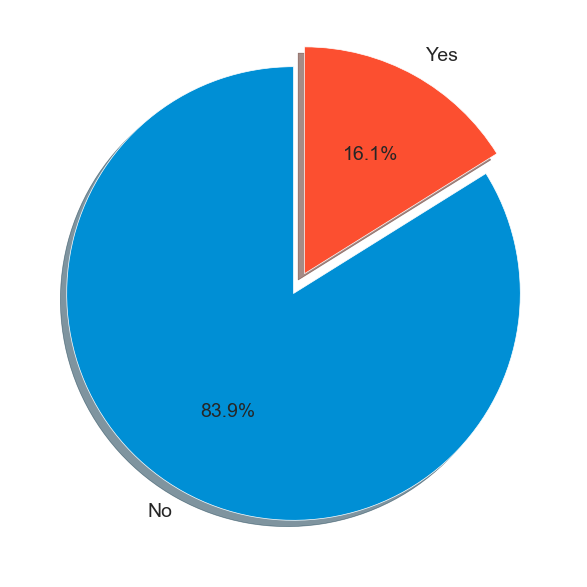

In [29]:
plt.figure(figsize=(7,7))
values=data['Attrition'].value_counts().values
labels=data['Attrition'].value_counts().index
plt.pie(values,labels= labels, autopct='%1.1f%%', explode= (0, 0.1), shadow=True, startangle=90)
plt.show()

# Imbalanced data
The above pie chart informs us that the number of observations with "No" is much larger than the number of observations with "Yes."

The pie chart suggests a skewness in our dependent variable.
Imbalanced classification refers to a classification predictive modeling problem where the number of examples in the training dataset for each class label is not balanced. That is, where the class distribution is not equal or close to equal but instead biased or skewed.


# How does attrition correlate with age?

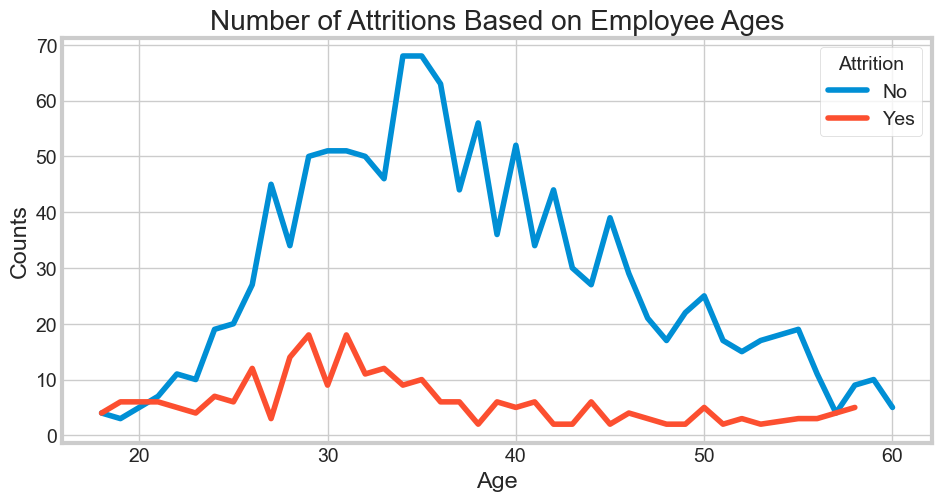

In [30]:
age_att = data.groupby(['Age', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')
plt.figure(figsize=(10, 5))
plt.title('Number of Attritions Based on Employee Ages')
sns.lineplot(x='Age', y='Counts', hue='Attrition', data=age_att)
plt.show()

The above line chart describes the number of attritions based on age. Attritions are highest when employees are between the ages of 28 and 32. The attrition rate has a generally negative slope after age 32.

The obvious negative slope after age 32 may be due to individuals seeking stability in their jobs at these ages. At very young ages, for instance, between 18 and 20, we can argue that it's more reasonable for a young employee to resign from their job because it's more likely that young individuals are in an exploration phase of their career. This exploration tends to have its zero point at age 21.

# Is salary a major factor in employee attrition?

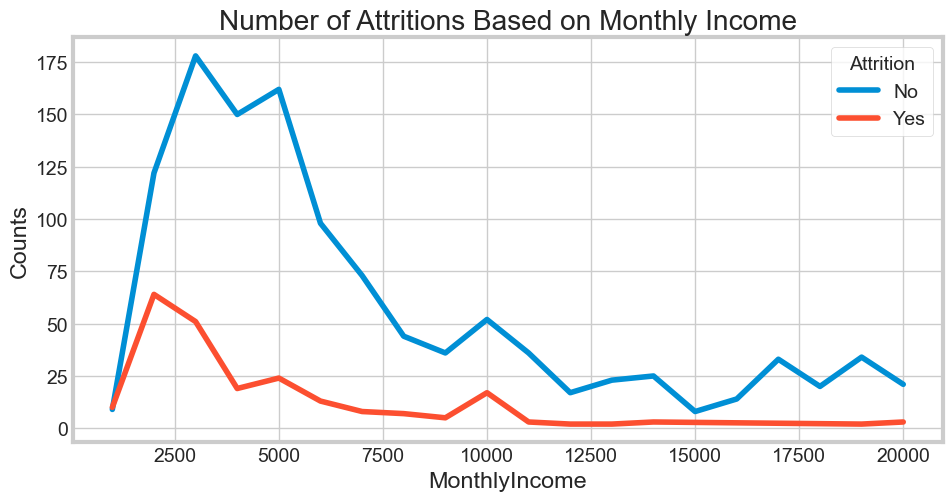

In [31]:
rate_att=data.groupby(['MonthlyIncome', 'Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome', 'Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
plt.figure(figsize=(10,5))
plt.title('Number of Attritions Based on Monthly Income')
sns.lineplot(x='MonthlyIncome', y='Counts', hue='Attrition', data=rate_att)
plt.show()

According to the above line chart, the attrition rate is significantly higher at very low salary levels (less than $5000). Generally, as the monthly income becomes more reasonable, the chances of an employee leaving the organization decrease, as seen by the flat line after $10000.


# Does department have any impact on attrition?

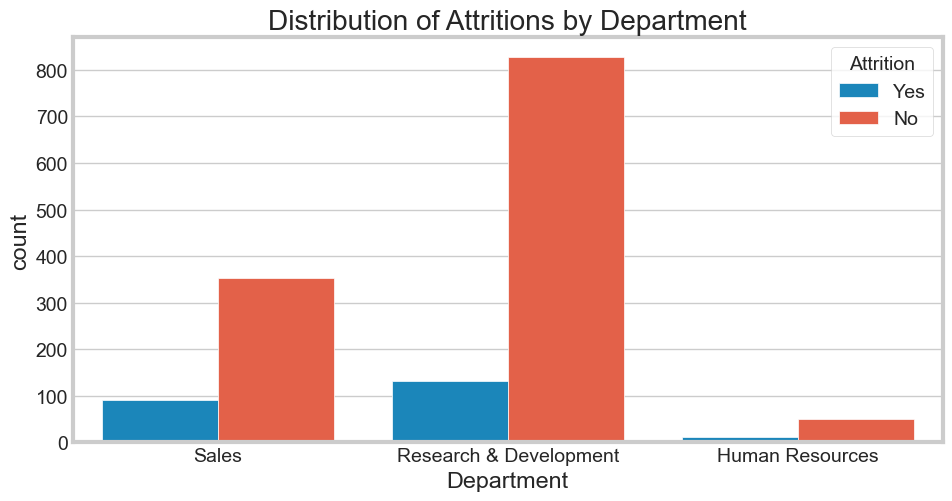

In [32]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Attritions by Department')
sns.countplot(x=data['Department'], hue=data['Attrition'])
plt.show()

In [33]:
d = data.groupby(by=['Attrition', 'Department']).count()
d

Age  BusinessTravel  DailyRate  \
Attrition Department                                               
No        Human Resources          51              51         51   
          Research & Development  828             828        828   
          Sales                   354             354        354   
Yes       Human Resources          12              12         12   
          Research & Development  133             133        133   
          Sales                    92              92         92   

                                  DistanceFromHome  Education  EducationField  \
Attrition Department                                                            
No        Human Resources                       51         51              51   
          Research & Development               828        828             828   
          Sales                                354        354             354   
Yes       Human Resources                       12         12              12   
          Research & Development               133        133             133   
          Sales                                 92         92              92   

                                  EmployeeCount  EmployeeNumber  \
Attrition Department                                              
No        Human Resources                    51              51   
          Research & Development            828             828   
          Sales                             354             354   
Yes       Human Resources                    12              12   
          Research & Development            133             133   
          Sales                              92              92   

                                  EnvironmentSatisfaction  Gender  ...  \
Attrition Department                                               ...   
No        Human Resources                              51      51  ...   
          Research & Development                      828     828  ...   
          Sales                                       354     354  ...   
Yes       Human Resources                              12      12  ...   
          Research & Development                      133     133  ...   
          Sales                                        92      92  ...   

                                  RelationshipSatisfaction  StandardHours  \
Attrition Department                                                        
No        Human Resources                               51             51   
          Research & Development                       828            828   
          Sales                                        354            354   
Yes       Human Resources                               12             12   
          Research & Development                       133            133   
          Sales                                         92             92   

                                  StockOptionLevel  TotalWorkingYears  \
Attrition Department                                                    
No        Human Resources                       51                 51   
          Research & Development               828                828   
          Sales                                354                354   
Yes       Human Resources                       12                 12   
          Research & Development               133                133   
          Sales                                 92                 92   

                                  TrainingTimesLastYear  WorkLifeBalance  \
Attrition Department                                                       
No        Human Resources                            51               51   
          Research & Development                    828              828   
          Sales                                     354              354   
Yes       Human Resources                            12               12   
          Research & Development                    

According to the above bar chart, we can see the three main departments ['Sales', 'Research & Development', 'Human Resources']. The department with the highest attrition rate is Sales, followed closely by HR. The lowest attrition rate per department is in Research & Development.
 SALES_ATT = 92, SALES_TOT = 466
 R&D_ATT = 133, R&D_TOT = 961
 HR_ATT = 12, HR_TOT = 63

> 92/466 = 0.1974248927 
133/961 = 0.138397502601457
12/63 = 0.1904761905

# Does job environment satisfaction have an impact on attrition?

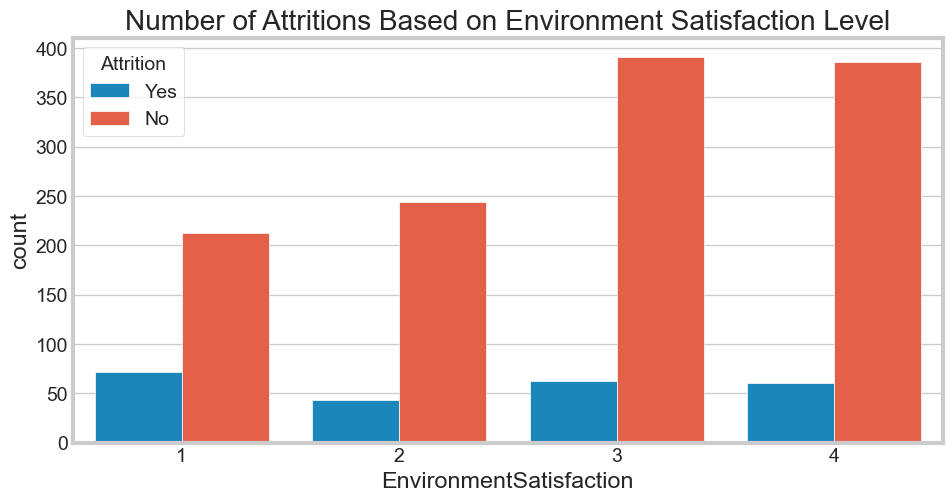

In [34]:
plt.figure(figsize=(10,5))
plt.title('Number of Attritions Based on Environment Satisfaction Level')
sns.countplot(x=data['EnvironmentSatisfaction'],hue=data['Attrition'])
plt.show()

In [35]:
d = data.groupby(by=["Attrition", "EnvironmentSatisfaction"]).count()
d

Age  BusinessTravel  DailyRate  Department  \
Attrition EnvironmentSatisfaction                                               
No        1                        212             212        212         212   
          2                        244             244        244         244   
          3                        391             391        391         391   
          4                        386             386        386         386   
Yes       1                         72              72         72          72   
          2                         43              43         43          43   
          3                         62              62         62          62   
          4                         60              60         60          60   

                                   DistanceFromHome  Education  \
Attrition EnvironmentSatisfaction                                
No        1                                     212        212   
          2                                     244        244   
          3                                     391        391   
          4                                     386        386   
Yes       1                                      72         72   
          2                                      43         43   
          3                                      62         62   
          4                                      60         60   

                                   EducationField  EmployeeCount  \
Attrition EnvironmentSatisfaction                                  
No        1                                   212            212   
          2                                   244            244   
          3                                   391            391   
          4                                   386            386   
Yes       1                                    72             72   
          2                                    43             43   
          3                                    62             62   
          4                                    60             60   

                                   EmployeeNumber  Gender  ...  \
Attrition EnvironmentSatisfaction                          ...   
No        1                                   212     212  ...   
          2                                   244     244  ...   
          3                                   391     391  ...   
          4                                   386     386  ...   
Yes       1                                    72      72  ...   
          2                                    43      43  ...   
          3                                    62      62  ...   
          4                                    60      60  ...   

                                   RelationshipSatisfaction  StandardHours  \
Attrition EnvironmentSatisfaction                                            
No        1                                             212            212   
          2                                             244            244   
          3                                             391            391   
          4                                             386            386   
Yes       1                                              72             72   
          2                                              43             43   
          3                                              62             62   
          4                                              60             60   

                                   StockOptionLevel  TotalWorkingYears  \
Attrition EnvironmentSatisfaction                                        
No        1                                     212                212   
          2                                     244                244   
          3                                     391                391   
          4                                     386                386

According to the above bar chart, we can observe four ordinal values measuring the number of attritions based on satisfaction levels. Between levels 1-2, the chances of employees leaving decrease. This decrease might indicate that employees expect things to get better by staying within the organization. However, we see an increase again between levels 2-3, which may be due to employees seeking new opportunities and experiences after a certain level of satisfaction, perhaps to take on more challenging roles.
n1_amount= 72, n1_tot= 284, 72/284= 0.253521126760563
n1_amount= 43, n2_tot= 287, 43/287= 0.149825783972125
n1_amount= 62, n3_tot = 453, 62/453= 0.136865342163355
n1_amount= 60, n4_tot = 546, 60/546= 0.10989010989011

# Does job satisfaction have an impact on attrition?

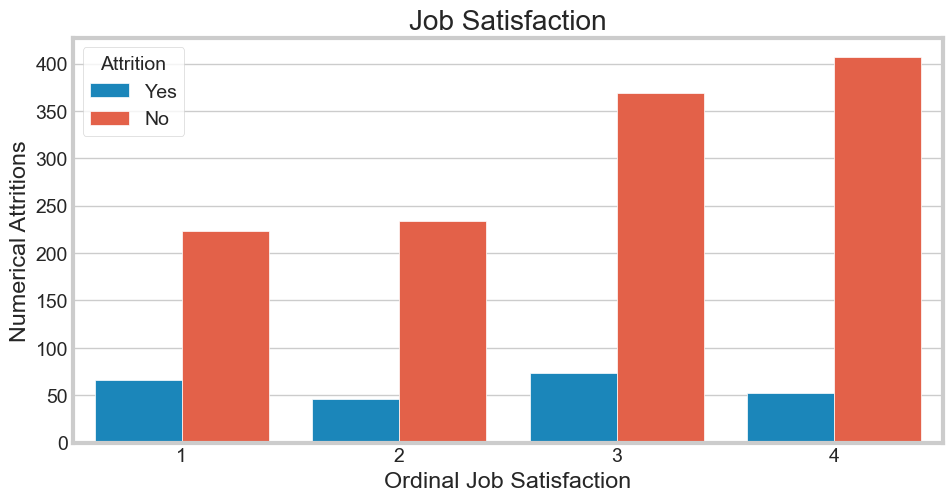

In [36]:
plt.figure(figsize=(10,5))
plt.title('Job Satisfaction')
plt.xlabel('Number of Attritions')
plt.ylabel('Levels of Job Satisfaction')
ax = sns.countplot(x=data['JobSatisfaction'], hue=data['Attrition'])
ax.set(xlabel='Ordinal Job Satisfaction', ylabel='Numerical Attritions')
plt.show()

According to the above bar chart, increasing job satisfaction reduces attritions. Specifically, between job satisfaction levels 1-2 & 3-4, the pattern/theory that at a certain satisfaction level, individuals tend to leave their jobs remains. Similar to the chart "Number of Attritions Based on Environment Satisfaction Level", we can assume the ranking from 2-3 indicates an increase because employees tend to choose opportunities over comfort at a certain satisfaction level.


# Does stock options level have an impact on attrition?

<Axes: title={'center': 'Number of resignations based on stock option levels'}, xlabel='StockOptionLevel', ylabel='count'>

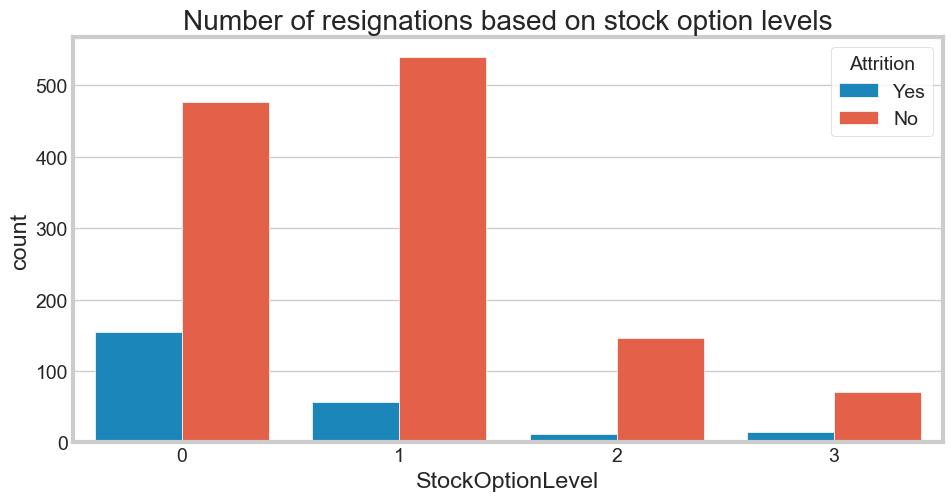

In [37]:
# Set the figure size
plt.figure(figsize=(10, 5))
# Set the title
plt.title('Number of resignations based on stock option levels')
# Create a countplot
sns.countplot(x=data['StockOptionLevel'], hue=data['Attrition'])

# According to the above bar chart, the chances are much higher that an employee will leave with lower stock options. We can argue that stocks represent a significant amount of money while the employee stays for the coming ages. Furthermore, if the company is doing well, stocks can be as crucial as the salary.


# Does work-life balance have any impact on resignation?

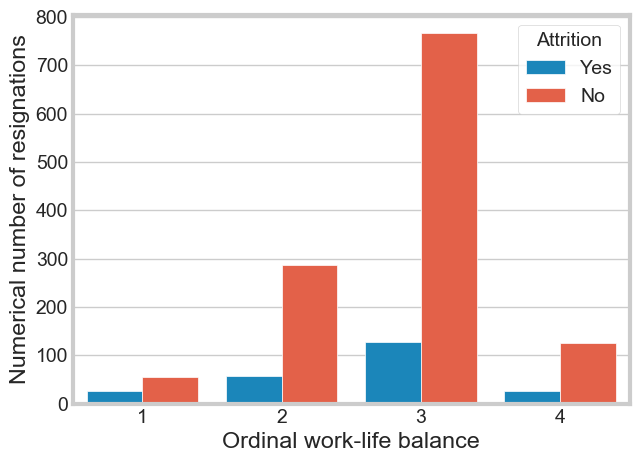

In [38]:
# Create a countplot
ax = sns.countplot(x=data['WorkLifeBalance'], hue=data['Attrition'])
# Set labels
ax.set(xlabel="Ordinal work-life balance", ylabel="Numerical number of resignations")
# Show the plot
plt.show()

People with lower work-life balance seem to tend to adapt to their jobs more at the expense of their personal lives. Employees may value the company more than their own personal lives, hence the chances are lower that the employee leaves the company in those with less good work-life balance. Those people who have better work-life balance tend to be more accustomed to the good life and may desire more responsibility or more challenges that are not present at the "current" workplace. However, we can announce that this trend disappears when the balance between work and private life is most balanced, as people are satisfied with the work they do.


# Does previous work experience have any impact on resignation?

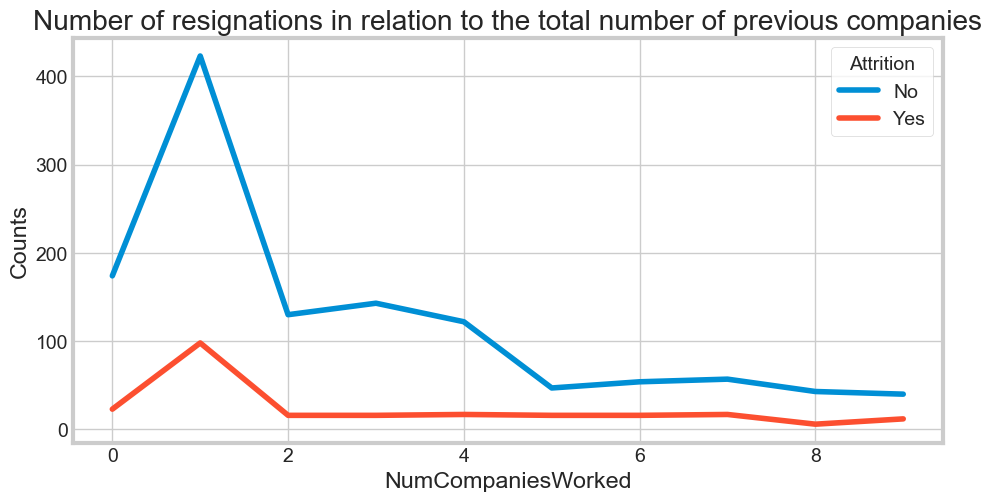

In [39]:
# Group the data and count
num_companies_worked_by_attrition = data.groupby(['NumCompaniesWorked', 'Attrition']).apply(
    lambda x: x['DailyRate'].count()).reset_index(name='Counts')
# Set the figure size
plt.figure(figsize=(10, 5))
# Set the title
plt.title("Number of resignations in relation to the total number of previous companies")
# Create a lineplot
sns.lineplot(x='NumCompaniesWorked', y='Counts', hue='Attrition', data=num_companies_worked_by_attrition)
# Show the plot
plt.show()

According to the above line chart, it is clear that employees who started their careers within the company - or switched to the company during the early years of their careers, have a higher chance of leaving the organization for another company. People who have gained a lot of experience - working in multiple companies tend to stay in the company they join.

# Does the percentage salary hike have an impact?

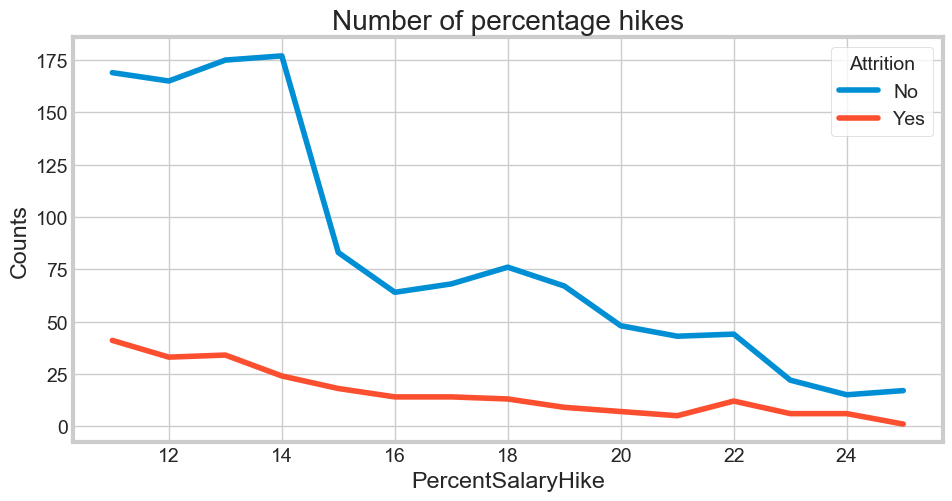

In [40]:
# Group the data and count
hike_att = data.groupby(["PercentSalaryHike", "Attrition"]).apply(lambda x: x["DailyRate"].count()).reset_index(
    name="Counts")
# Set the figure size
plt.figure(figsize=(10, 5))
# Set the title
plt.title("Number of percentage hikes")
# Create a lineplot
sns.lineplot(x="PercentSalaryHike", y='Counts', hue='Attrition', data=hike_att)
# Show the plot
plt.show()

The above line chart shows that higher percentages tend to motivate people to work better and stay in the organization. It is reasonable for an employee to leave an organization with a low percentage salary hike. At higher percentages of the salary, resignations tend to decrease.


# How does the time spent with the current manager affect resignation?


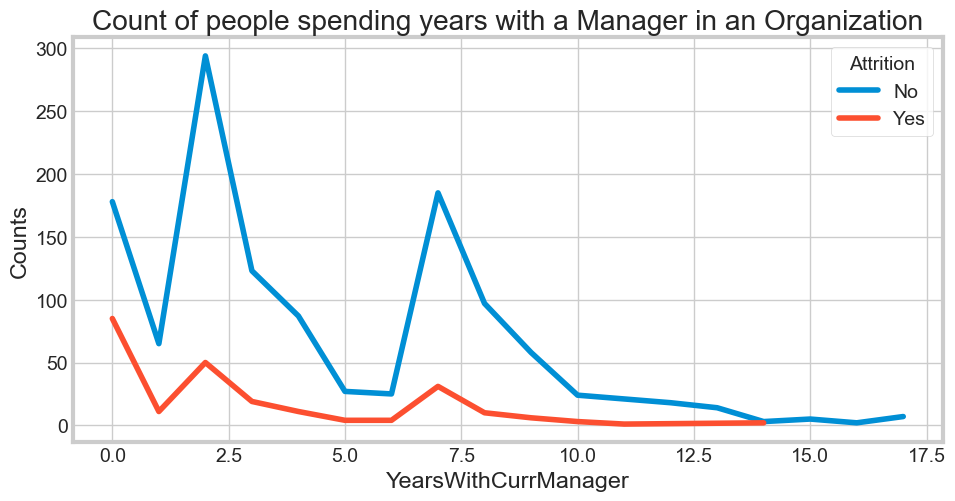

In [41]:
# Group the data and count
man_att = data.groupby(['YearsWithCurrManager', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(
    name='Counts')
# Set the figure size
plt.figure(figsize=(10, 5))
# Set the title
plt.title('Count of people spending years with a Manager in an Organization')
# Create a lineplot
sns.lineplot(x='YearsWithCurrManager', y='Counts', hue='Attrition', data=man_att)
# Show the plot
plt.show()

The above line chart describes three major peaks in the resignation rate when analyzing the relationship between an employee and their manager. In the beginning, where the period with the manager is shorter, people tend to leave their jobs. At around 2 years, employees may experience a need for development, which can increase the likelihood of an employee leaving for other job opportunities. When the time spent with the manager is somewhat longer (around 7 years), people tend to find that their career development stagnates and tend to go for a change. However, when the relative time with a manager is very high, people are satisfied with their work. Therefore, the chance of an employee resigning is significantly lower.


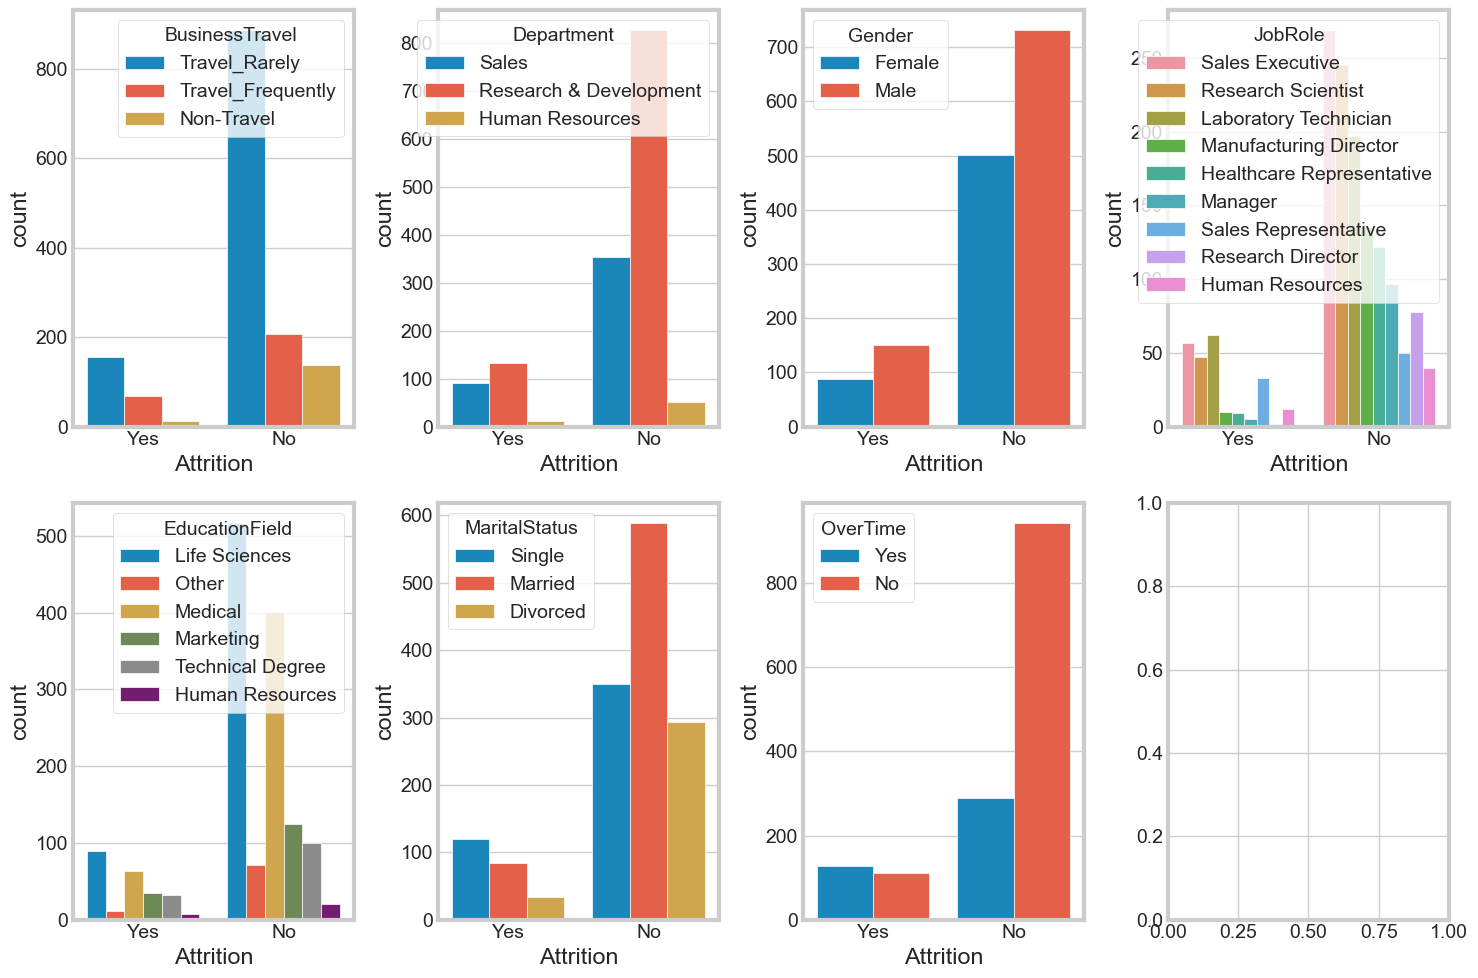

In [42]:
# Visualization for non numerical features
fig,x_y_main_plot_axis = plt.subplots(2,4, figsize=[15,10])

sns.countplot(x='Attrition', hue='BusinessTravel', data=data, ax=x_y_main_plot_axis[0][0])
sns.countplot(x='Attrition', hue='Department', data=data, ax=x_y_main_plot_axis[0][1])
sns.countplot(x='Attrition', hue='Gender', data=data, ax=x_y_main_plot_axis[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=data, ax=x_y_main_plot_axis[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=data, ax=x_y_main_plot_axis[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=data, ax=x_y_main_plot_axis[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=data, ax=x_y_main_plot_axis[1][2])
plt.tight_layout()

In [43]:
pearson_str_corr = pd.DataFrame({'str_corr': ['very_strong', 'strong', 'moderate', 'weak', 'very weak'], 'range_of_absolute_corr_coefficient': ['0.80-1', '0.60-0.79','0.40-0-59','0.20-0.39' ,'0-0.19']})
pearson_str_corr

,str_corr,range_of_absolute_corr_coefficient
0,very_strong,0.80-1
1,strong,0.60-0.79
2,moderate,0.40-0-59
3,weak,0.20-0.39
4,very weak,0-0.19


<Axes: >

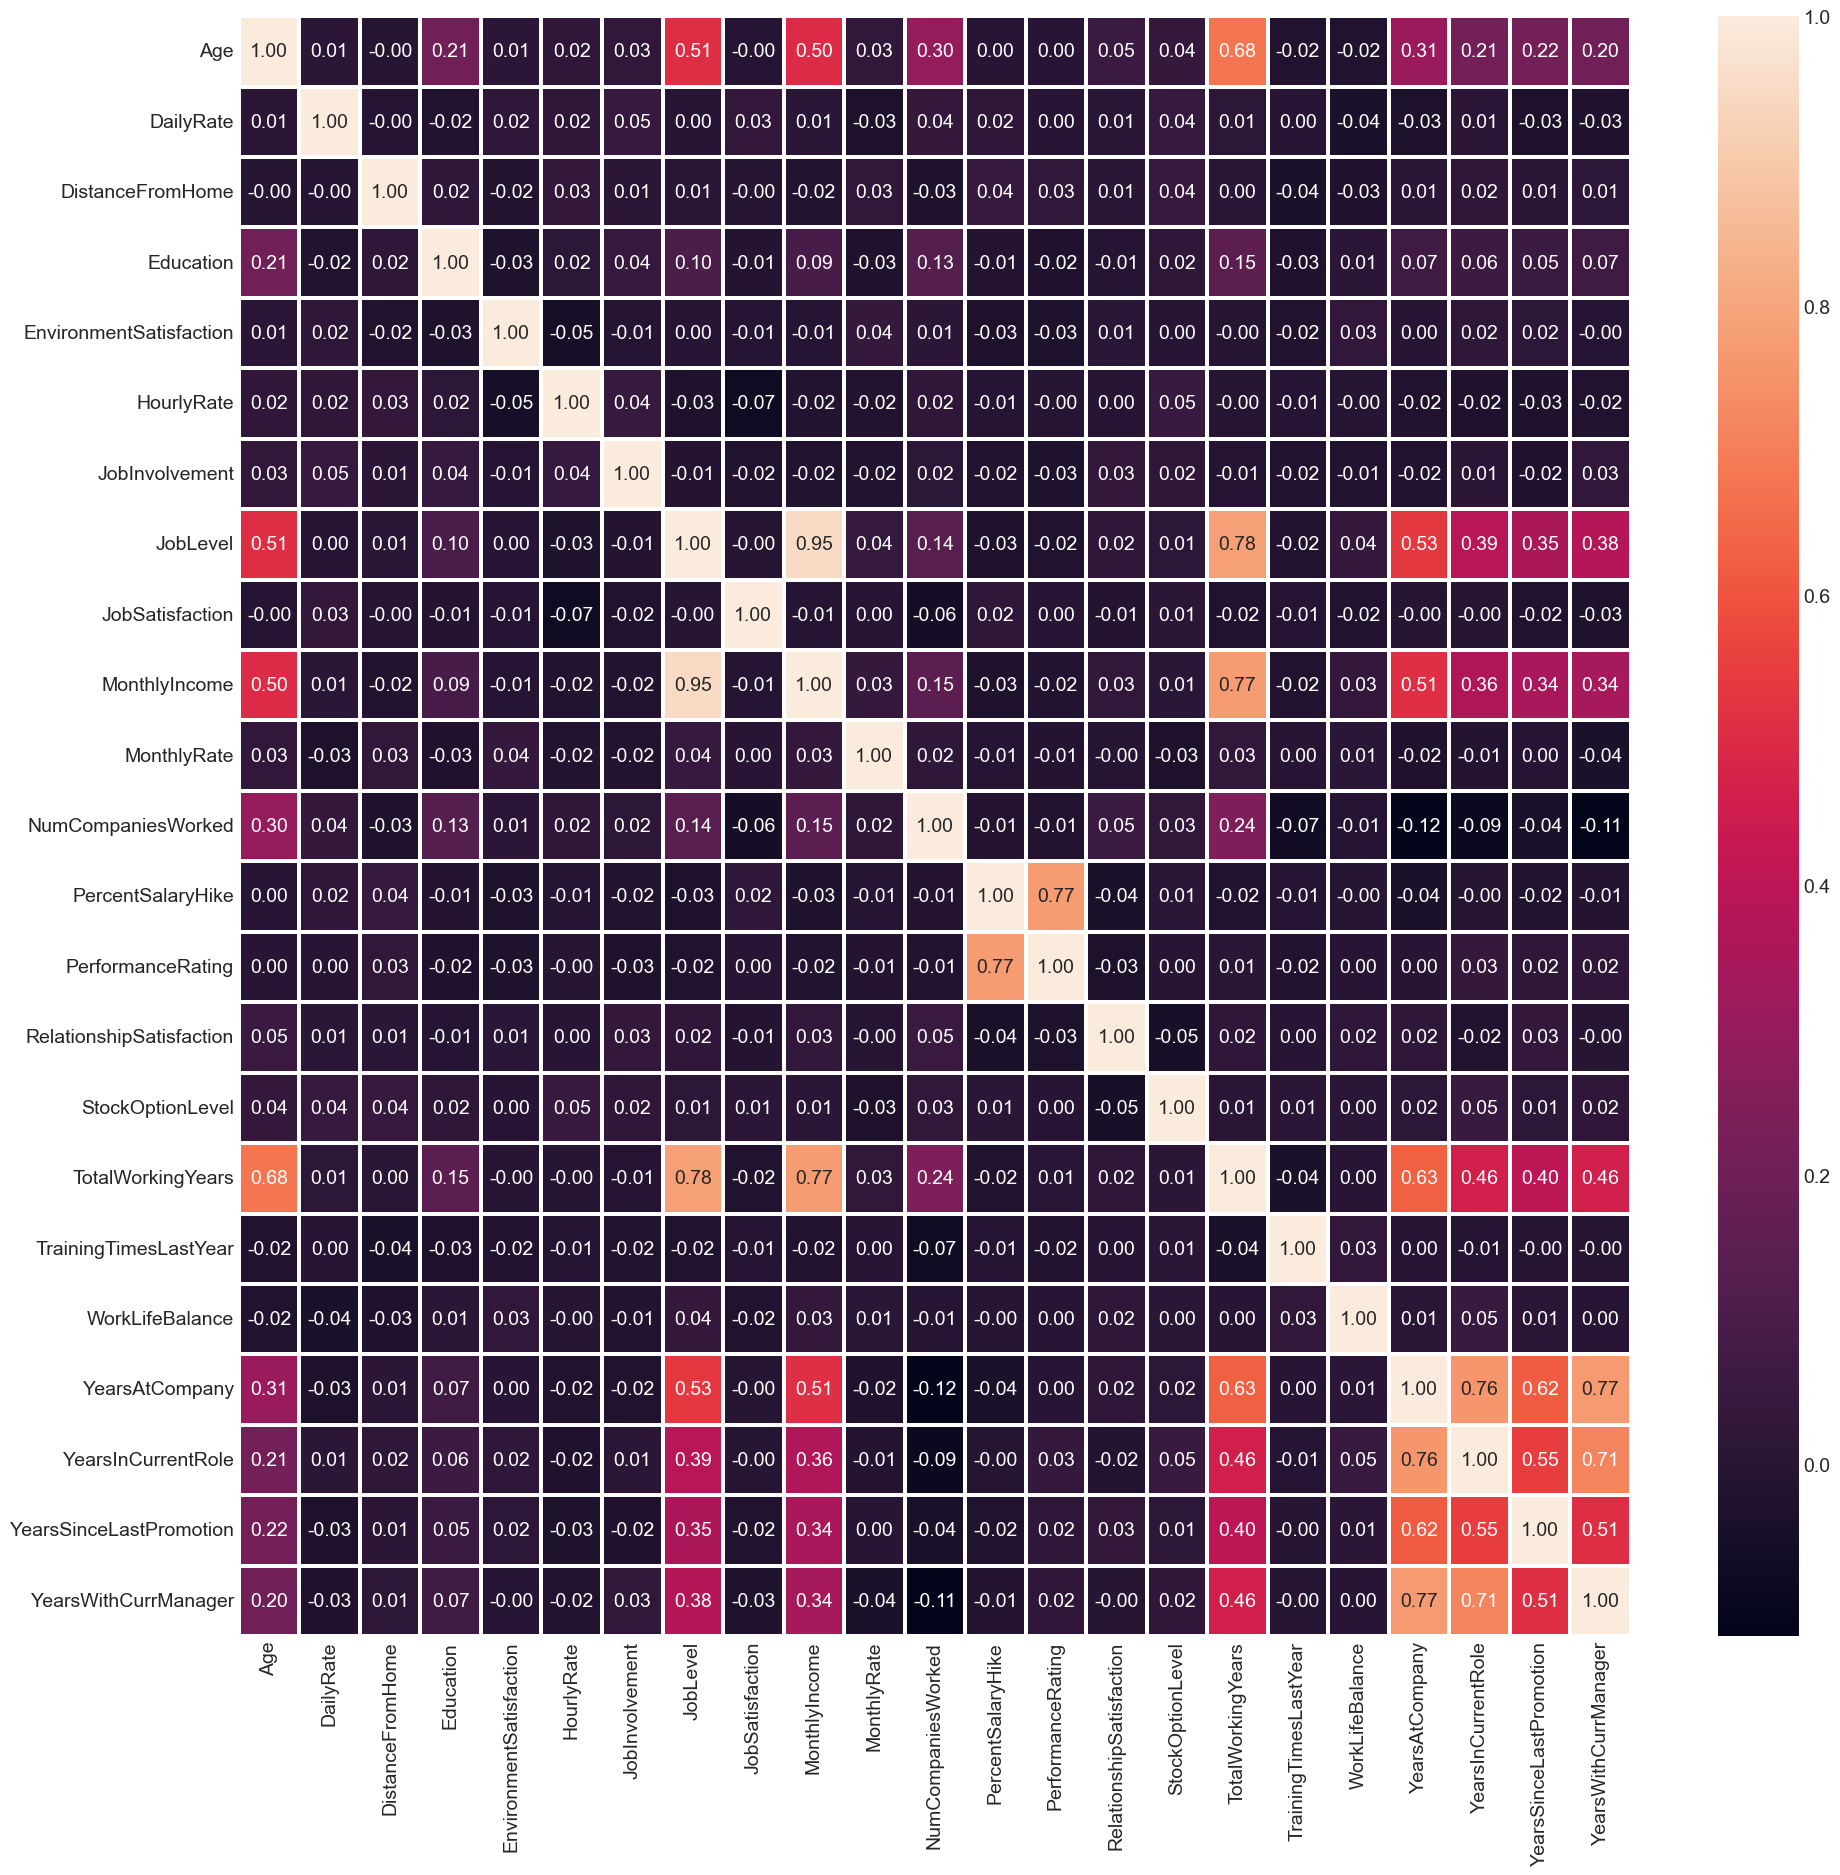

In [44]:
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=1.5, fmt= '.2f',ax=ax)

# Job level has a strong correlation with total years at the company
# Monthly income has a very strong correlation with job level
# Monthly income has a strong correlation with the total sum of years worked
# Age has a moderate correlation with monthly income